# **GRIP@The Sparks Foundation**

## **Prexa Kamani**

---
### **Task 3: Exploratory Data Analysis- Retail**


---


---


## **Import the Libraries**

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
import io
df = pd.read_csv('SampleSuperstore.csv')



In [12]:
df.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [16]:
df.shape

(9994, 13)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [18]:
#Deleting the unnecessary columns ie-Postal Code because as of now we already have the city names
df.drop(columns=['Postal Code'],inplace=True)


In [19]:
#Scanning for null values
df.isna()
df.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [20]:
#Describing the data
df.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000



## **Visualizing the Data**

<AxesSubplot:xlabel='Category', ylabel='count'>

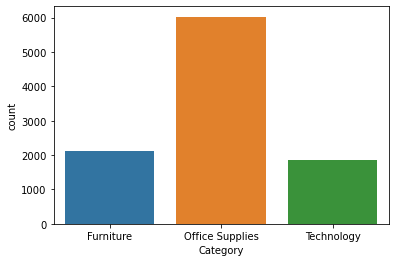

In [21]:
sns.countplot(x=df["Category"])

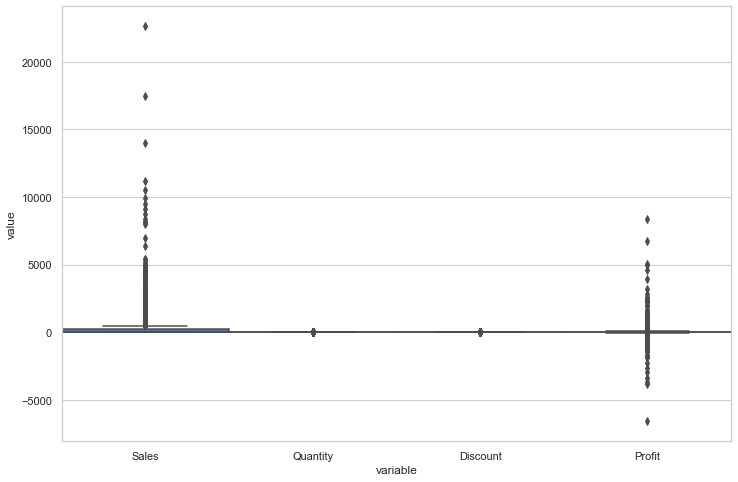

In [22]:
df_num = df.select_dtypes(include = [np.number])
plt.figure(figsize = [12, 8])
sns.set(style = 'whitegrid')
sns.boxplot(x = 'variable', y = 'value', data = pd.melt(df_num), width = 1)
plt.show()

**From the above plot, the outliers in Sale and Profit are clearly visible. As it is a large dataset, we can remove those rows containing outliers in order to improve our results.**

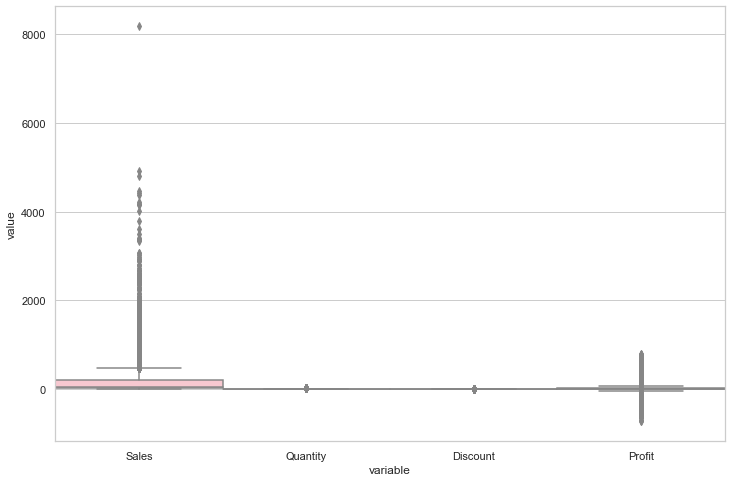

In [32]:
def remove_outlier(dataset, k= 3.33):
    for col in dataset.columns:
        if (dataset[col].dtype == 'int64' or dataset[col].dtype == 'float64'):
            mean = dataset[col].mean()
            global ds
            std = dataset[col].std()
            outlier = [i for i in dataset[col] if (i > mean - k * std)]
            outlier = [i for i in outlier if (i < mean + k * std)]
            ds = dataset.loc[dataset[col].isin(outlier)]

remove_outlier(df, k = 3.33)
ds_num = ds.select_dtypes(include = [np.number])
plt.figure(figsize = [12, 8])
sns.set(style = 'whitegrid')
sns.boxplot(x = 'variable', y = 'value', data = pd.melt(ds_num), width = 1,color='pink')
plt.show()

**From the above BoxPlot, it is visible that most of the outliers are removed and thus we will use this dataset for EDA.**

## **Exploratory Data Analysis**



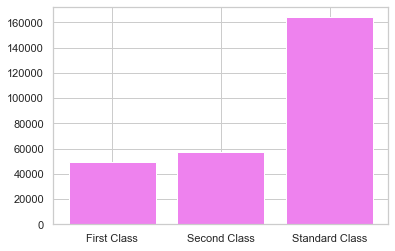

In [33]:
profitsofclasses=[]
for i in ["First Class", "Second Class",  "Standard Class"]:
  profitsofclasses.append(sum(df[df["Ship Mode"] == i]["Profit"]))

plt.bar(["First Class", "Second Class",  "Standard Class"], profitsofclasses,color='violet')
plt.show()

**This shows that highest profits of the company is from the Standard Class shipment.**

<AxesSubplot:>

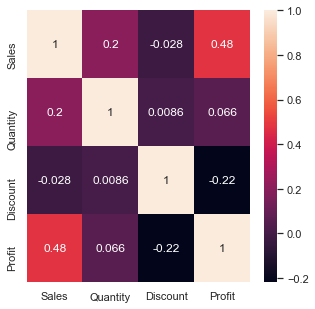

In [25]:
df1 = df.drop(columns = ["Ship Mode" ,"City", "State","Region", "Category","Sub-Category"])
import seaborn as sns

corr = df1.corr()
fig,ax = plt.subplots(figsize = (5,5))
sns.heatmap(corr, annot = True, ax=ax)

**This Matrix shows that there is no Correlation between any variables i.e., We can infer that profits and sales don't increase with increase in discount.**

<AxesSubplot:xlabel='State', ylabel='count'>

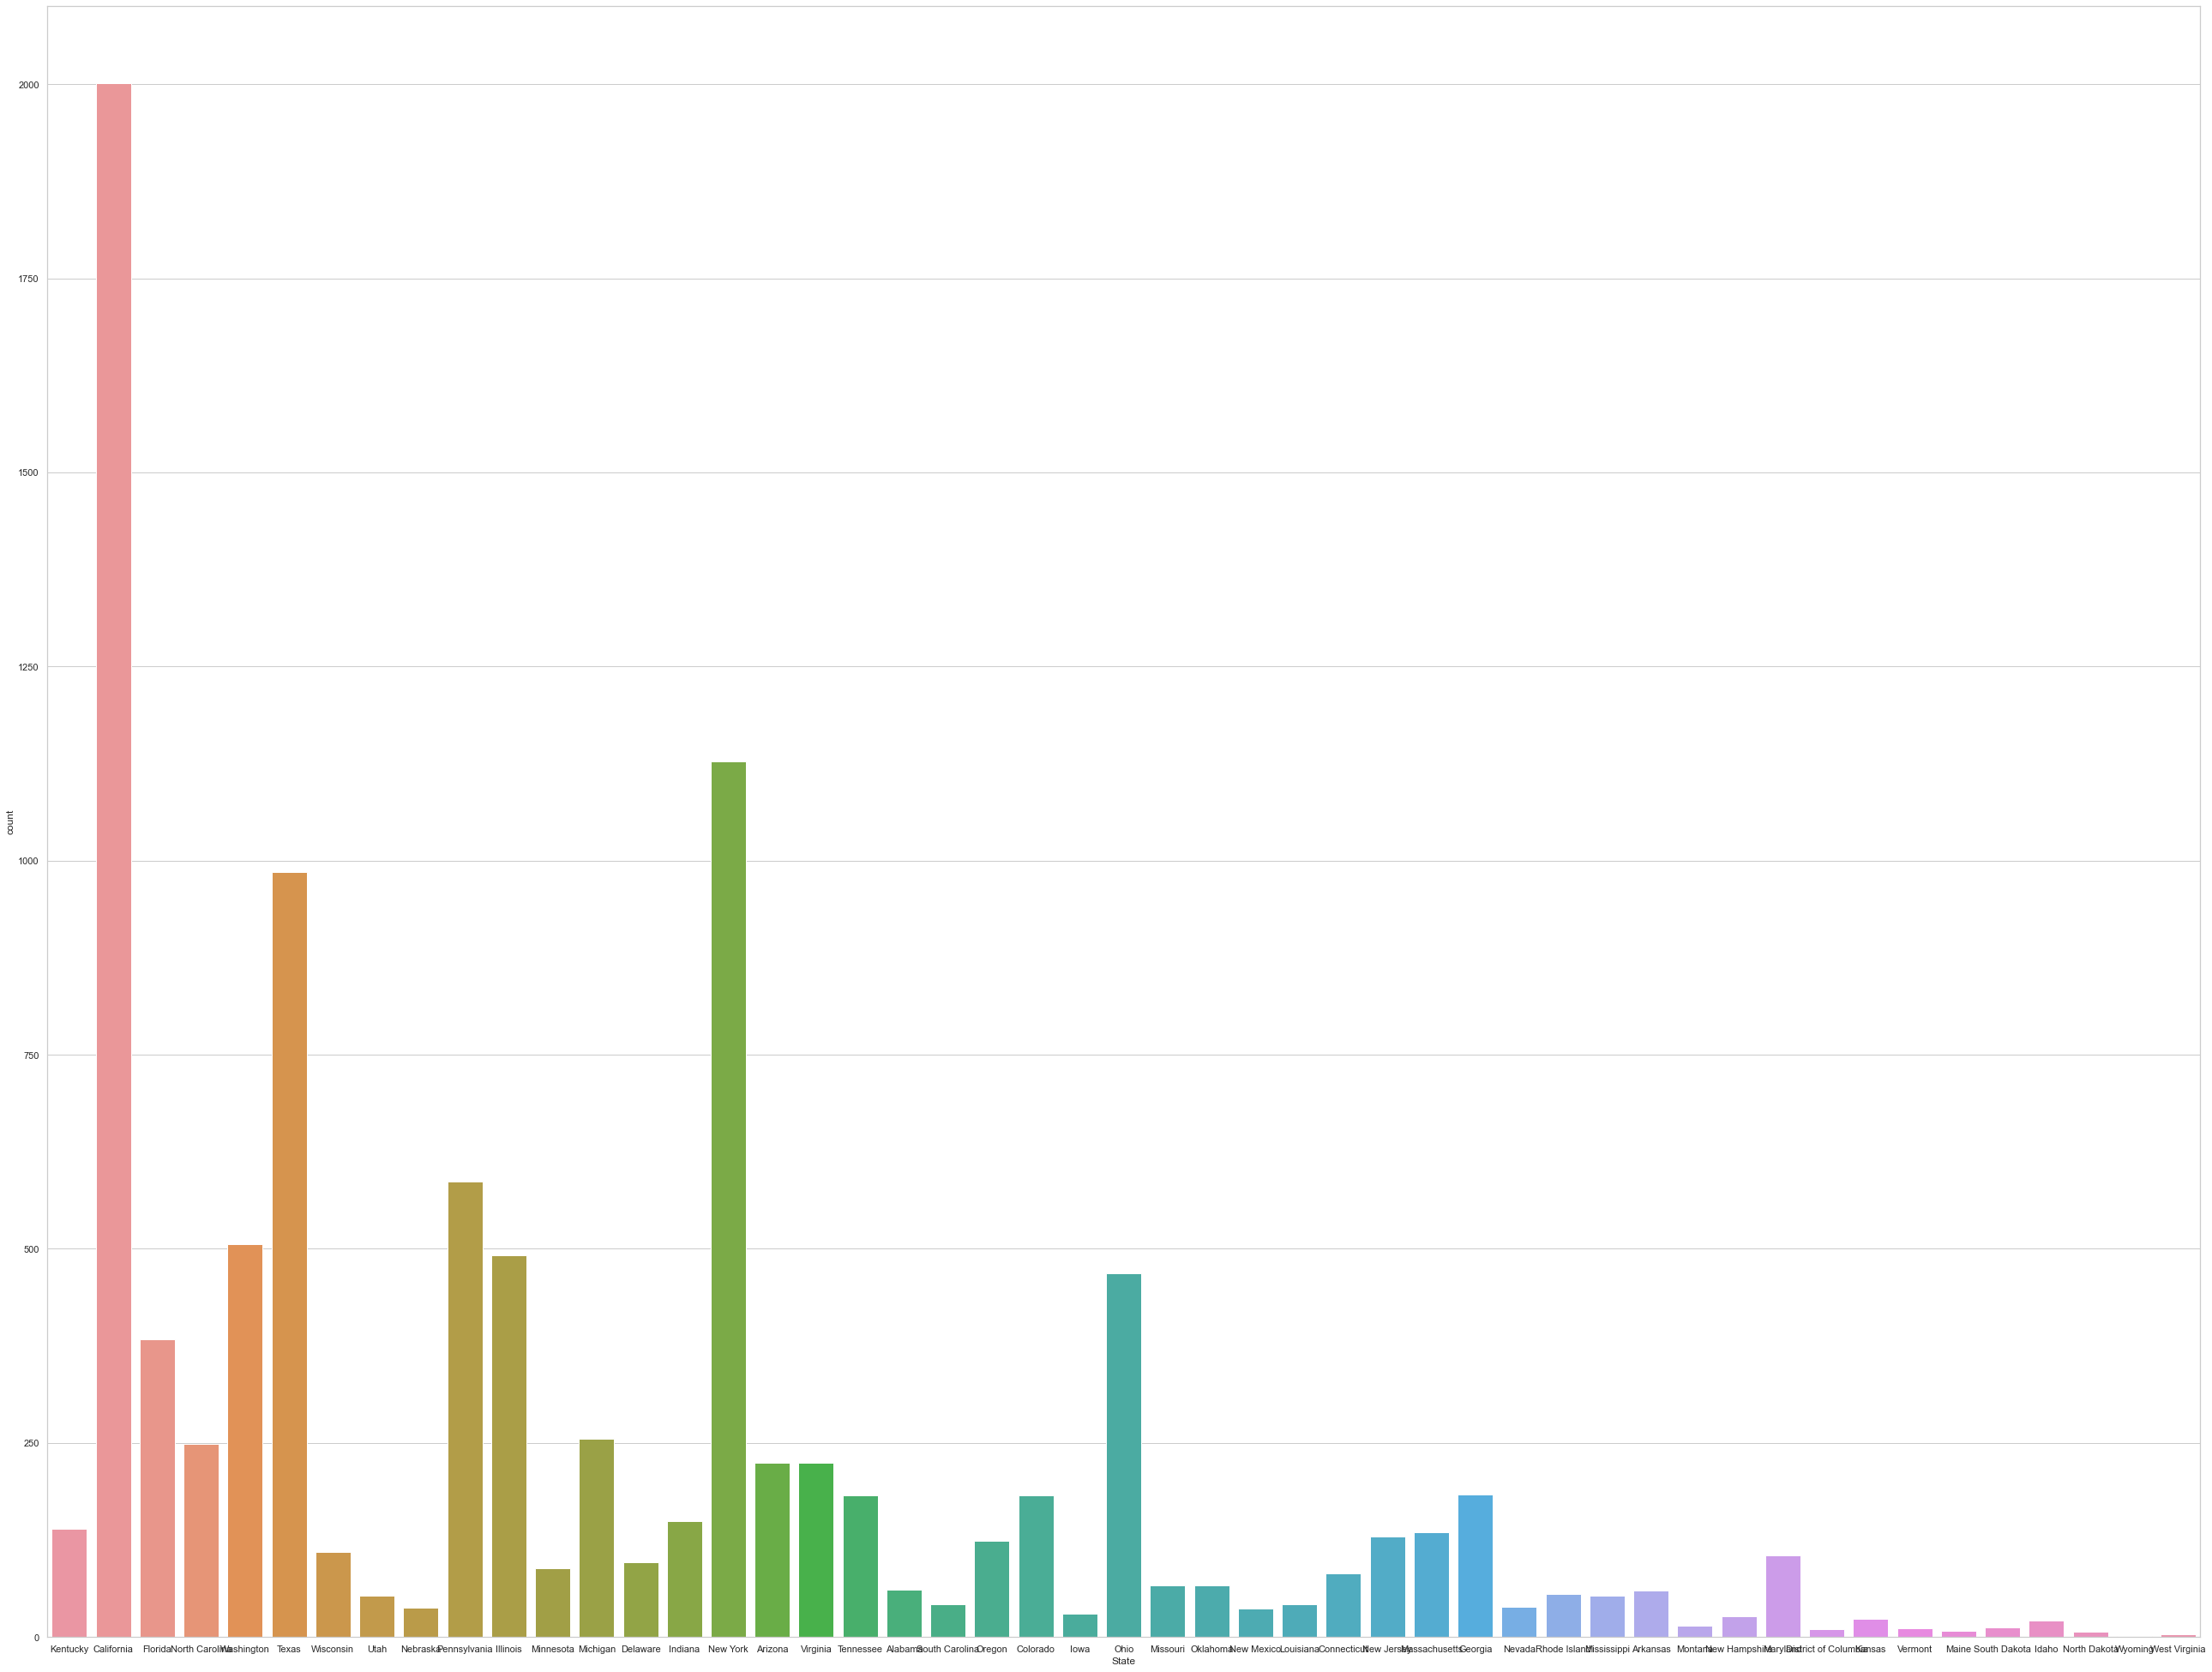

In [26]:
#no of states

plt.figure(figsize=(45,35))
sns.countplot(x=df["State"])

**This shows that maximum sales is from one state. Need to improve in the rest of the states.**

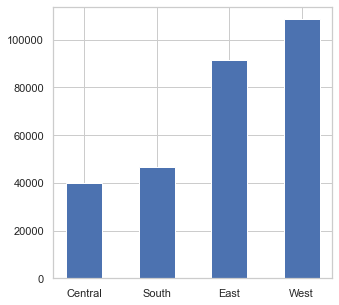

In [27]:
profitsofregions = []
for i in list(df.Region.unique()):
  profitsofregions.append((i , sum(df[df["Region"] == i]["Profit"])))

profitsofregions.sort( key = lambda x: x[1])
x=[]
y=[]
for i in profitsofregions[:11]:
  x.append(i[0])
  y.append(i[1])
plt.figure(figsize = (5,5))
plt.bar(x,y, width= 0.5)
plt.show()

**The East and West region has satisfactory profits. The Central and South region has the lowest profits. And therefore Central and South region needs some work to be done to increase the profits.**

In [28]:
groups = ds.groupby('City')
total_profits = groups['Profit'].agg(np.sum).sort_values(ascending = False).reset_index()
total_profits.head()


,City,Profit
0,New York City,39957.8971
1,Los Angeles,26553.7452
2,Seattle,18951.2609
3,San Francisco,16562.3989
4,Detroit,8235.4208


**These are the leading cities in terms of profits.**

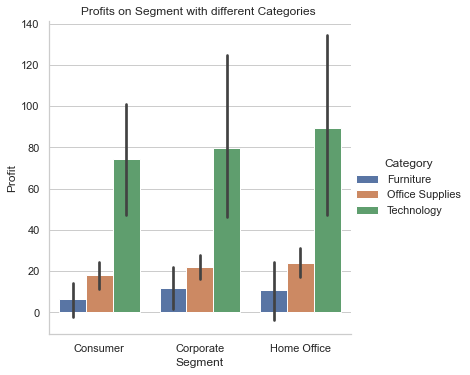

In [29]:
sns.catplot(x="Segment", y="Profit", kind="bar",hue='Category', data=df)
plt.title('Profits on Segment with different Categories ')
plt.show()

**These are the categories which is responsible for the profit. Maximum Profit comes from the "Technology"**

In [30]:
total_discount = groups['Discount'].agg(np.sum).sort_values(ascending = False).reset_index()
total_discount.head()

,City,Discount
0,Philadelphia,173.70
1,Houston,139.94
2,Chicago,118.70
3,Dallas,55.50
4,Los Angeles,54.70



**The above cities has the highest of discounts and yet their profits are not among the highest. Thus we can reduce the discounts in these cities.**

In [31]:
filtering_data=(df["Profit"]< 28.656896) & (df["Sales"]< 229.858001)
df[filtering_data]


,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.620,2,0.0,6.8714
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.368,2,0.2,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,West,Furniture,Furnishings,48.860,7,0.0,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,West,Office Supplies,Art,7.280,4,0.0,1.9656
8,Standard Class,Consumer,United States,Los Angeles,California,West,Office Supplies,Binders,18.504,3,0.2,5.7825
...,...,...,...,...,...,...,...,...,...,...,...,...
9985,Standard Class,Consumer,United States,Long Beach,New York,East,Office Supplies,Supplies,55.600,4,0.0,16.1240
9986,Standard Class,Consumer,United States,Los Angeles,California,West,Technology,Accessories,36.240,1,0.0,15.2208
9989,Second Class,Consumer,United States,Miami,Florida,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,West,Furniture,Furnishings,91.960,2,0.0,15.6332


**From above data we can conclude that there are  sales and profits which are less than that of their mean values. So we should concentrate on the above data for more profits**